In [ ]:
"""環境"""
# .lab

"""更新履歴"""
# 最終更新日：2025/05/17
# 2025/05/15 simple_progress_barおよびdata(dict)を使い始めました。
# 2025/02/25 os.getcwd()を採用し、__file__を定義する必要をなくしました。

"""モジュール読み込み"""
# ファイル操作等
import sys
import os
# from datetime import datetime
from pprint import pprint
import logging
# import pickle
# import struct
from tqdm import tqdm
import h5py
# import threading
import json

# tkinter
from tkinter import filedialog, messagebox, Tk

# データ分析ツール
import pandas as pd
import numpy as np
import scipy as sp
# import math
# from sklearn.linear_model import LinearRegression

# グラフ等作成用
import matplotlib
import matplotlib.pyplot as plt         # 図の作成用
from PIL import Image as im
# import cv2
from IPython.display import display, HTML, clear_output, update_display, Image

# 自作モジュール
sys.path.append(r"C:\Users\okaza\pythonenv")
from modules.Mytools.Tools import print_fileinfo, h5_tree, dict_tree, simple_progress_bar
import modules.Mytools.Settings
import modules.fitXRD as fx
from modules.peakfit import peakfit, pseudoVoigt

"""ログ管理ツール作成"""
# chche directoryの設定
cachedir = os.path.abspath(os.getcwd() + "/.cache")
os.makedirs(cachedir, exist_ok=True)

# loggerの作成
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
format = "%(levelname)-9s  %(asctime)s [%(filename)s:%(lineno)d] %(message)s"

# Streamハンドラクラスを作成
sh = logging.StreamHandler()
sh.setLevel(logging.DEBUG)
sh.setFormatter(logging.Formatter(format))
logger.addHandler(sh)

# Fileハンドラクラスをインスタンス化
logfile = cachedir + ""
fh = logging.FileHandler(filename=cachedir + "/notebook.log", encoding="utf-8")
fh.setLevel(logging.DEBUG)
fh.setFormatter(logging.Formatter(format))
logger.addHandler(fh)
logger.debug("[Activate workspace]: " + os.getcwd())
logger.debug("[Set cache]: "+ os.path.abspath(cachedir))
logger.debug("[Activate log]: " + os.path.abspath(cachedir + "/notebook.log"))

# globalなデータを作成
data = dict()
logger.debug("[Create global variable]: data")

DEBUG      2025-07-13 11:19:15,358 [3310388256.py:69] [Activate workspace]: c:\Users\okaza\pythonenv\fpd\png_anim
DEBUG      2025-07-13 11:19:15,362 [3310388256.py:70] [Set cache]: c:\Users\okaza\pythonenv\fpd\png_anim\.cache
DEBUG      2025-07-13 11:19:15,364 [3310388256.py:71] [Activate log]: c:\Users\okaza\pythonenv\fpd\png_anim\.cache\notebook.log
DEBUG      2025-07-13 11:19:15,366 [3310388256.py:75] [Create global variable]: data


## 目的

フラットパネルのpng画像を動画にします。

## 1. ファイルの読み込み

まずファイルリストを作成します。

In [2]:
def set_filelist():

    # ディレクトリ名を指定
    dir = r"D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1"
    
    # ヘッダーとフッターを指定
    header = "UODE20_40_"
    footer = ".png"

    if True: # Main

        # ヘッダーとフッターを含むファイル名を取得
        flist = list()
        for __ in os.listdir(dir):
            if not header in __:
                continue
            if not footer in __:
                continue
            flist.append(__)
        logger.debug("Read filenames")

        # ソート
        flist.sort(key = (lambda x: int(x.replace(header, "").replace(footer, ""))))
        logger.debug("Sort the file name list")

        # 表示
        for f in flist:
            print(os.path.abspath(dir + "/" + f))

        # 格納
        key = sys._getframe().f_code.co_name
        data[key] = dict()
        data[key]["dir"] = dir
        data[key]["flist"] = flist
        data[key]["header"] = header
        data[key]["footer"] = footer
        logger.info("[Add variables]: " + key)
        dict_tree(data)

    return
set_filelist()
del set_filelist

DEBUG      2025-07-13 11:19:55,853 [3567931455.py:20] Read filenames
DEBUG      2025-07-13 11:19:55,856 [3567931455.py:24] Sort the file name list
INFO       2025-07-13 11:19:55,863 [3567931455.py:37] [Add variables]: set_filelist


D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_0.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_1.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_2.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_3.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_4.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_5.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_6.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_7.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_8.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_9.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_10.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_11.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_12.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_13.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_14.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_15.png
D:\SPring8_2-25_July\Okazaki\UODE20\FPD_1\UODE20_40_16.png
D:\SPri

画像を読み込んで、hdfファイルに保存します。

In [3]:
import threading
import concurrent.futures as confu

In [4]:
def convertPNG2HDF():

    """更新履歴
    2025/06/25: 
    """

    # 変数読み込み
    dir = data["set_filelist"]["dir"]
    flist = data["set_filelist"]["flist"]
    n_frame = len(flist)

    # hdfファイル初期化
    key = sys._getframe().f_code.co_name
    hdffilename = cachedir + "/" + key + ".hdf"
    tmpimage = np.array(im.open(dir + "/" + flist[0]))
    with h5py.File(hdffilename, mode = "w") as f:
        for i in tqdm(range(n_frame)):
            f.create_dataset(
                name = "frame = {}".format(i),
                shape = tmpimage.shape,
                dtype = tmpimage.dtype
            )
    
    # lock
    lock = threading.Lock()

    # 演算
    with confu.ThreadPoolExecutor(max_workers=os.cpu_count()) as tpe:
        
        # 演算開始
        futures = [
            tpe.submit(
                lambda filename: (filename, np.array(im.open(dir + "/" + filename))),
                filename
            ) for filename in flist
        ]

        # 終わったプロセスから順に出力
        for i, future in enumerate(confu.as_completed(futures)):
            image = future.result()
            with lock:
                j = int(image[0].replace(data["set_filelist"]["header"], "").replace(data["set_filelist"]["footer"], ""))
                with h5py.File(hdffilename, mode = "r+") as f:
                    f["frame = {}".format(j)][:] = image[1] # type: ignore
            simple_progress_bar(i+1, n_frame)

    # 表示
    data[key] = dict()
    data[key]["hdf"] = hdffilename
    logger.info("[Add variables]: " + key)
    with h5py.File(hdffilename, mode = "r") as f:
        h5_tree(f)
    

    return
convertPNG2HDF()
del convertPNG2HDF

100%|██████████| 542/542 [00:00<00:00, 16432.08it/s]


Progress: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■-] 100% (540/542) 

INFO       2025-07-13 11:21:34,058 [921167887.py:50] [Add variables]: convertPNG2HDF


Progress: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100% (542/542) 
<HDF5 file "convertPNG2HDF.hdf" (mode r)>
├── frame = 0 ((4096, 4096, 3), uint8)
├── frame = 1 ((4096, 4096, 3), uint8)
├── frame = 10 ((4096, 4096, 3), uint8)
├── frame = 100 ((4096, 4096, 3), uint8)
├── frame = 101 ((4096, 4096, 3), uint8)
├── frame = 102 ((4096, 4096, 3), uint8)
├── frame = 103 ((4096, 4096, 3), uint8)
├── frame = 104 ((4096, 4096, 3), uint8)
├── frame = 105 ((4096, 4096, 3), uint8)
├── frame = 106 ((4096, 4096, 3), uint8)
├── frame = 107 ((4096, 4096, 3), uint8)
├── frame = 108 ((4096, 4096, 3), uint8)
├── frame = 109 ((4096, 4096, 3), uint8)
├── frame = 11 ((4096, 4096, 3), uint8)
├── frame = 110 ((4096, 4096, 3), uint8)
├── frame = 111 ((4096, 4096, 3), uint8)
├── frame = 112 ((4096, 4096, 3), uint8)
├── frame = 113 ((4096, 4096, 3), uint8)
├── frame = 114 ((4096, 4096, 3), uint8)
├── frame = 115 ((4096, 4096, 3), uint8)
├── frame = 116 ((4096, 4096, 3), uint8)
├── frame = 117 ((4096, 4096, 3), 

## 2. 編集

次に動画にする位置を決定します。

DEBUG      2025-07-13 11:23:14,459 [3863157933.py:15] Load image (shape = (4096, 4096, 3))


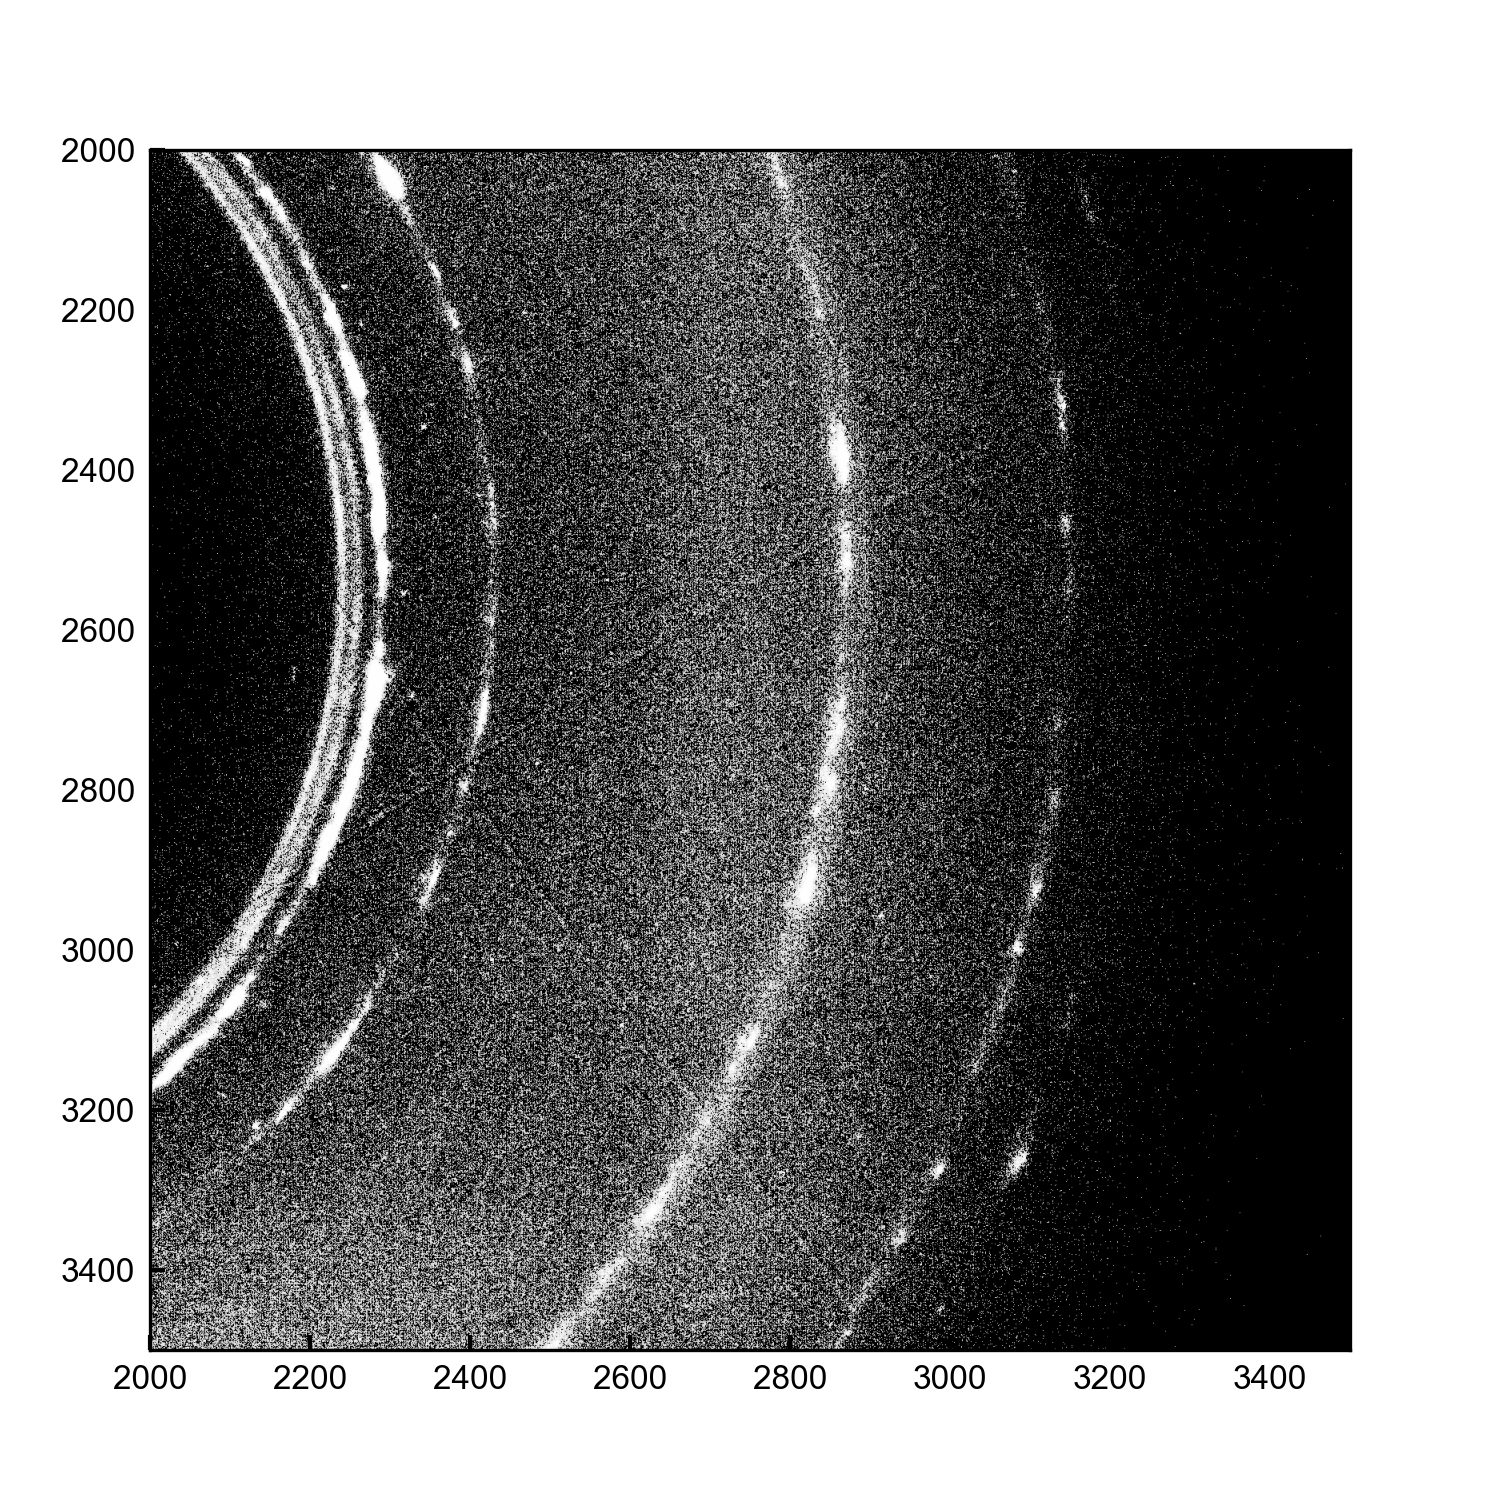

DEBUG      2025-07-13 11:23:14,653 [3863157933.py:48] [Save fig]: c:\Users\okaza\pythonenv\fpd\png_anim\.cache\set_lim.png
INFO       2025-07-13 11:23:14,653 [3863157933.py:54] [Add variables]: set_lim



├── set_filelist
│   ├── dir <class 'str'>
│   ├── flist <class 'list'>
│   ├── header <class 'str'>
│   └── footer <class 'str'>
├── convertPNG2HDF
│   └── hdf <class 'str'>
└── set_lim
    ├── x <class 'tuple'>
    └── y <class 'tuple'>

In [9]:
def set_lim():

    # フレームを指定します。
    framenumber = 10

    # 軸を指定します。
    xaxis = (2000, 3500)
    yaxis = (2000, 3500)

    if True: # Main

        # 画像読み込み
        with h5py.File(data["convertPNG2HDF"]["hdf"], mode = "r") as f:
            image: np.ndarray = f["frame = {}".format(framenumber)][()] # type: ignore
        logger.debug("Load image (shape = {})".format(image.shape))

        # figure作成
        fig, ax = plt.subplots()
        fig.set_size_inches((5,5)) # type: ignore
        fig.set_dpi(300)
        fig.subplots_adjust(
            left = 0.1,
            right = 0.9,
            bottom = 0.1,
            top = 0.9
        )

        # imshow
        ax.imshow(
            image[yaxis[0]:yaxis[1], xaxis[0]:xaxis[1]],
            extent = (*xaxis, *(yaxis[::-1])), # type: ignore
            aspect = "equal"
        )

        # 画像の表示
        fig.canvas.draw()
        img = im.frombuffer(
            mode = "RGBA",
            size = fig.canvas.get_width_height(),
            data = fig.canvas.buffer_rgba(), # type: ignore
            decoder_name = "raw"
        )
        plt.close()
        key = sys._getframe().f_code.co_name
        imgfilename = cachedir + "/{}.png".format(key)
        img.save(imgfilename)
        display(Image(filename = imgfilename, width = 600))
        logger.debug("[Save fig]: " + os.path.abspath(imgfilename))

        # 格納
        data[key] = dict()
        data[key]["x"] = xaxis
        data[key]["y"] = yaxis
        logger.info("[Add variables]: " + key)
        dict_tree(data)
    
    return
set_lim()
del set_lim

## 3. 出力

動画を作成します。

In [10]:
import matplotlib.animation as anim # type: ignore

In [11]:
def make_anim():

    # 変数の呼び出し
    dir = data["set_filelist"]["dir"]
    flist = data["set_filelist"]["flist"]
    xaxis = data["set_lim"]["x"]
    yaxis = data["set_lim"]["y"]
    n_frame = len(flist)

    # figureの作成
    fig, ax = plt.subplots()
    fig.set_size_inches((5,5)) # type: ignore

    # 動画作成
    ims = []
    with h5py.File(data["convertPNG2HDF"]["hdf"], mode = "r") as f:
        for i in range(n_frame):
            image: np.ndarray = f["frame = {}".format(i)][()] # type: ignore
            image = ax.imshow(
                image[yaxis[0]:yaxis[1], xaxis[0]:xaxis[1]],
                extent = (*xaxis, *(yaxis[::-1])), # type: ignore
                aspect = "equal"
            )
            tex = ax.text(0,1.01, "frame number = {:>4}".format(i), fontsize = 12, transform = ax.transAxes)
            ims.append([image, tex])
            simple_progress_bar(i+1, n_frame)

    #. 保存
    logger.debug("[Save]: Animation")
    ani = anim.ArtistAnimation(fig, ims, interval = 100)
    key = sys._getframe().f_code.co_name
    filename = cachedir + "/" + key + ".mp4"
    ani.save(filename, writer = "ffmpeg", fps = 30, dpi = 300)
    logger.info("[Save]: " + os.path.abspath(filename))
    plt.close()

    return
make_anim()
del make_anim

Progress: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■-]  99% (537/542) 

DEBUG      2025-07-13 11:23:45,262 [2171473133.py:29] [Save]: Animation


Progress: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100% (542/542) 


INFO       2025-07-13 11:24:40,799 [2171473133.py:34] [Save]: c:\Users\okaza\pythonenv\fpd\png_anim\.cache\make_anim.mp4
